In [59]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

In [9]:
import io
df = pd.read_csv(io.BytesIO(uploaded['crop_dataset.csv']))
df.head()


,Soil type,temperature,humidity,ph,rainfall,label
0,Alluvial,20.879744,82.002744,6.502985,202.935536,rice
1,Alluvial,21.770462,80.319644,7.038096,226.655537,rice
2,Alluvial,23.004459,82.320763,7.840207,263.964248,rice
3,Alluvial,26.491096,80.158363,6.980401,242.864034,rice
4,Alluvial,20.130175,81.604873,7.628473,262.717340,rice


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Soil type    3100 non-null   object 
 1   temperature  3100 non-null   float64
 2   humidity     3100 non-null   float64
 3   ph           3100 non-null   float64
 4   rainfall     3100 non-null   float64
 5   label        3100 non-null   object 
dtypes: float64(4), object(2)
memory usage: 145.4+ KB


In [11]:
df.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [12]:
df.corr()

,temperature,humidity,ph,rainfall
temperature,1.000000,-0.076999,0.017024,-0.055143
humidity,-0.076999,1.000000,-0.002359,0.192074
ph,0.017024,-0.002359,1.000000,-0.288598
rainfall,-0.055143,0.192074,-0.288598,1.000000


In [13]:
df.isnull().sum()

Soil type      0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

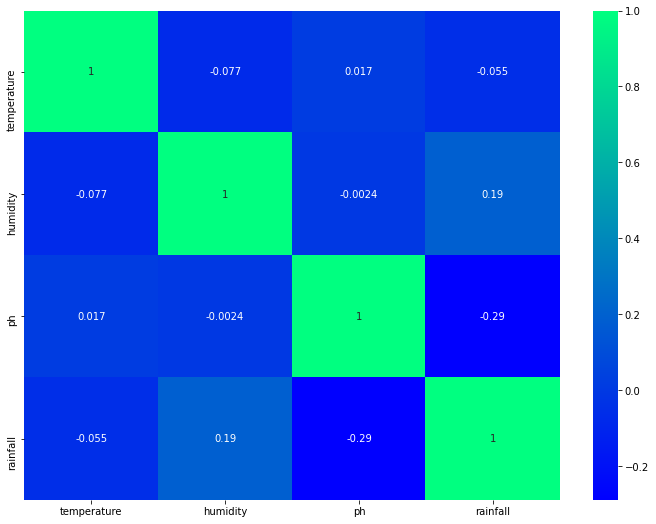

In [14]:
plt.figure(figsize = (12,9))
g = sns.heatmap(df.corr(),annot = True,cmap = 'winter')
g

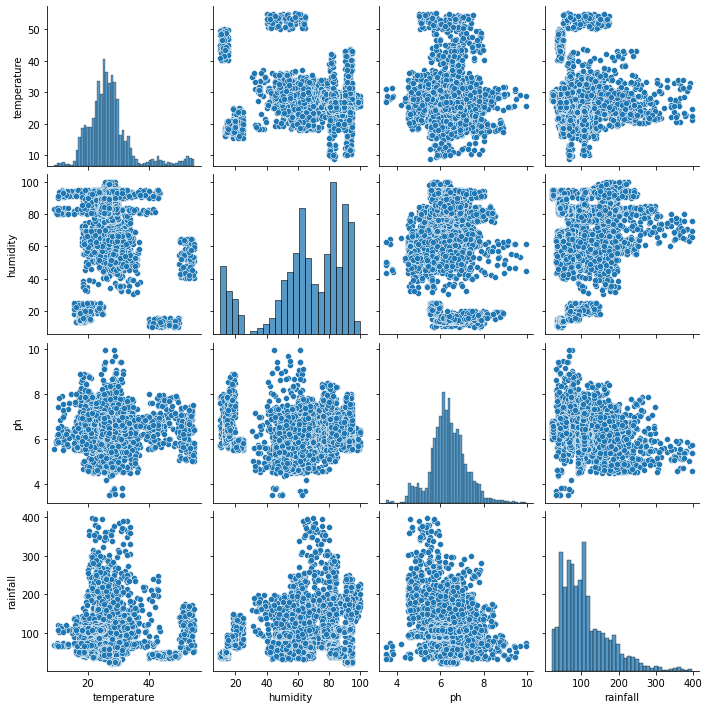

In [15]:
sns.pairplot(df)

In [16]:
df['Soil type'] = pd.get_dummies(df['Soil type'])
df.head()

,Soil type,temperature,humidity,ph,rainfall,label
0,1,20.879744,82.002744,6.502985,202.935536,rice
1,1,21.770462,80.319644,7.038096,226.655537,rice
2,1,23.004459,82.320763,7.840207,263.964248,rice
3,1,26.491096,80.158363,6.980401,242.864034,rice
4,1,20.130175,81.604873,7.628473,262.717340,rice


In [17]:
x = df.iloc[:,:-1].values
y = df.iloc[::,-1].values

In [18]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x[0:4]

array([[ 2.39871062, -0.82335105,  0.66645303,  0.16565468,  1.44792422],
       [ 2.39871062, -0.70561045,  0.59633508,  0.82681916,  1.81832798],
       [ 2.39871062, -0.54249304,  0.67970169,  1.81787913,  2.40092855],
       [ 2.39871062, -0.08160778,  0.58961609,  0.75553268,  2.07143454]])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [56]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
svc = SVC(probability=True,kernel = 'linear')
model= AdaBoostClassifier(base_estimator=svc,n_estimators=100,learning_rate=0.1)
model.fit(x_train,y_train)
ypredict = model.predict(x_test)


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypredict)

0.7793548387096774

0.10967741935483871